# First pass analysis of line/loop data

<ul>
    <li> Analyse correct sequence lengths. </li>
    <li> Do reaction times </li>
    <li> Analyse as a function of distance from reward </li>
    <li> Try to fit RL model to these data </li> 
    
</ul>

<b> WHY IS THERE A DIFFERENCE BETWEEN REW_LIST AND DAT_DICT['STATE'] </b>

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import functools
from scipy import optimize as op
import networkx as nx
from datetime import date, timedelta
from datetime import datetime

seaborn.set(font_scale=1.5,style='ticks',rc={'axes.edgecolor': 'k',
                                             'axes.linewidth': 2,
                                             #'xtick.major.size': 6,
                                             'axes.labelcolor':'k',
                                             'xtick.major.width': 2,
                                             'ytick.major.width': 2,
                                             'xtick.major.pad': 5.5,
                                             'ytick.major.pad': 5.5,
                                             'axes.labelsize': 18
                                            })


#sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master")
#sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master\packages")
sys.path.append("/Users/yves/Documents/Code/line_loop/packages/")

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import mouse_poker as mpk
from mouse_poker.navi import *

# Defined functions 

In [4]:
poke_pos = [ [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [5]:
ROOT_loop = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_toLOOP//'
ROOT_line = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI///'


In [6]:
ix_ = 8
ROOT = ROOT_line
fs = sorted(os.listdir(ROOT))
f = os.path.join(ROOT,fs[ix_])

In [7]:
lines = open(f,'r').readlines()
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)

dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)

poke_to_state_map,full_pkst_map = get_poke_to_state_map(lines)
used_states = sorted([i[1] for i in full_pkst_map])
used_pokes = ([i[0] for i in full_pkst_map])

map_poke_to_state = functools.partial(map_poke_to_state_fun,full_pkst_map)
map_state_to_poke = functools.partial(map_state_to_poke_fun,full_pkst_map)
rew_indices = np.unique([eval(re.findall('REWARD LOCATIONS(\[.*\])',l)[0]) for l in lines if re.findall('REWARD LOCATIONS(\[.*\])',l)][0]).tolist()

print(nRews)
#decision_seq, forced = get_trajectories(dat_dict,used_states)

126


In [8]:
lines

['I Experiment name  : line_loop_batch_3NAVI\n',
 'I Task name : YW\\transition_task_yw_growing_navi_big_cohort\n',
 'I Task file hash : 706656022\n',
 'I Setup ID : COM4\n',
 "I Subject ID : '456675_10'\n",
 'I Start date : 2021/02/25 11:04:23\n',
 '\n',
 'S {"handle_poke": 1, "reward_consumption": 2, "deliver_reward": 3, "lights_off": 4, "ITI": 5}\n',
 '\n',
 'E {"lights_off_timer": 29, "poke_2_out": 9, "poke_8_out": 21, "repeat_timer": 30, "light_timer": 27, "rew_timer": 26, "poke_3_out": 11, "poke_9": 22, "poke_8": 20, "poke_5_out": 15, "poke_timer": 28, "ITI_timer": 31, "poke_3": 10, "poke_2": 8, "poke_1": 6, "poke_4_out": 13, "poke_6_out": 17, "poke_7": 18, "poke_6": 16, "poke_1_out": 7, "poke_5": 14, "poke_4": 12, "poke_7_out": 19, "poke_9_out": 23, "end_consumption": 24, "session_timer": 25}\n',
 '\n',
 'V 0 task_nr 2\n',
 'V 0 reward_volume 2\n',
 'V 0 click_volume 40\n',
 'V 0 setup_number 5\n',
 "V 0 subject_id '456675_10'\n",
 'V 0 reward_absorbP 0\n',
 'V 0 TEST False\n',


In [9]:
used_states

[3, 4, 5, 6, 7, 8]

In [10]:
state_seq, rew_list, port_seq,forced_seq = extract_navi_dat(lines)

In [11]:
for i,j,k in zip(state_seq,forced_seq,rew_list):
    print('state:{:.2f}  | forced:{:.2f}  |  rew:{:.2f}'.format(i,j,k))

state:4.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00  |  rew:0.00
state:4.00  | forced:0.00  |  rew:0.00
state:3.00  | forced:1.00  |  rew:0.00
state:4.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00  |  rew:0.00
state:4.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00  |  rew:0.00
state:6.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00  |  rew:0.00
state:4.00  | forced:1.00  |  rew:0.00
state:5.00  | forced:1.00  |  rew:0.00
state:6.00  | forced:1.00  |  rew:0.00
state:7.00  | forced:1.00  |  rew:1.00
state:5.00  | forced:0.00  |  rew:0.00
state:4.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00  |  rew:0.00
state:4.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00  |  rew:0.00
state:4.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00  |  rew:0.00
state:6.00  | forced:0.00  |  rew:0.00
state:7.00  | forced:0.00  |  rew:1.00
state:3.00  | forced:0.00  |  rew:0.00
state:4.00  | forced:0.00  |  rew:0.00
state:5.00  | forced:0.00

In [12]:
decision_seq, forced = get_trajectories(state_seq,rew_list,port_seq,forced_seq,used_states)

In [13]:
bernoulli_ll = lambda p,x: x*np.log(p) + (1-x)*np.log(1-p)
sigmoid = lambda x: 1/(1+np.exp(-(x[1]-x[0])))
        gammas = [G**i for i in reversed(range(len(decs)))]


In [14]:
def bLogL(args,used_states,decision_seq,forced):
    alpha,rVal,G = args
    Q_values = np.zeros([len(used_states),2])
    ll = 0
    predD = []
    for trl,(decs,fcd) in enumerate(zip(decision_seq,forced)):
        Q_new = Q_values.copy()
        gammas = [G**i for i in reversed(range(len(decs)))]
        if len(decs)>1:
            for dix, (d_,f_) in enumerate(zip(decs[1:],fcd[1:])):
                if not f_:  #if not forced
                    up = 1 if decs[dix]<d_ else 0
                    #print(up,decs[dix],d_)
                    ll += bernoulli_ll(sigmoid(Q_values[decs[dix]]),up)
                    #predD.append((sigmoid(Q_values[decs[dix]])>.5)==up)
                    Q_new[decs[dix],up] = alpha*Q_new[decs[dix],up] + (1-alpha)*gammas[dix]*rVal


        Q_values = Q_new.copy()
    return -ll

In [15]:
op.minimize(fun=bLogL,
            x0=[.45,2,.9],
            args=(used_states,decision_seq,forced),
            method='L-BFGS-B',
            bounds=[[0,1],[0,10],[0,1]])

      fun: 234.05171033727953
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.10844667e-04, -5.40012479e-05, -2.55226951e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 88
      nit: 19
   status: 0
  success: True
        x: array([0.09055039, 5.93775312, 0.97819869])

In [32]:
bernoulli_ll = lambda p,x: x*np.log(p) + (1-x)*np.log(1-p)
sigmoid = lambda x: 1/(1+np.exp(-(x[1]-x[0])))
Q_values = np.zeros([len(used_states),2])
ll = 0
predD = []
G = .95
alpha = .5
rVal = 5.
for trl,(decs,fcd) in enumerate(zip(decision_seq,forced)):
    Q_new = Q_values.copy()
    gammas = [G**i for i in reversed(range(len(decs)))]
    if len(decs)>1:
        for dix, (d_,f_) in enumerate(zip(decs[1:],fcd[1:])):
            if not f_:  #if not forced
                up = 1 if decs[dix]<d_ else 0
                print(up,decs[dix],d_)
                ll += bernoulli_ll(sigmoid(Q_values[decs[dix]]),up)
                predD.append((sigmoid(Q_values[decs[dix]])>.5)==up)
                Q_new[decs[dix],up] = alpha*Q_new[decs[dix],up] + (1-alpha)*gammas[dix]*rVal
            
        
    Q_values = Q_new.copy()
    


0 1 0
1 3 4
0 4 3
0 3 2
1 2 3
1 3 4
1 4 5
0 5 0
0 3 2
0 2 1
0 1 0
1 0 1
1 1 2
1 2 3
1 3 4
1 4 5
0 5 0
0 3 2
1 2 3
1 3 4
1 4 5
0 5 0
1 4 5
0 5 4
1 4 5
0 5 0
0 5 4
0 4 3
0 3 2
1 2 3
1 3 4
1 4 5
0 5 0
1 0 1
0 1 0
1 2 3
1 3 4
1 4 5
0 5 0
0 5 4
1 4 5
0 5 0
1 0 5
0 5 0
1 0 5
0 5 4
1 4 5
0 5 0
0 4 3
0 3 2
0 2 1
0 1 0
0 4 3
0 3 2
1 2 3
1 3 4
1 4 5
0 5 0
1 0 1
1 1 2
1 2 3
1 3 4
1 4 5
0 5 0
0 2 1
1 1 2
1 2 3
1 3 4
1 4 5
0 5 4
1 4 5
0 5 0
1 1 2
0 2 1
0 1 0
0 4 3
1 3 4
1 4 5
0 5 0
1 0 1
0 1 0
1 0 5
0 5 0
0 5 0
1 0 5
0 5 0
1 0 5
0 5 0
1 0 5
0 5 0
1 0 5
0 5 4
0 1 0
1 0 5
0 5 0
1 0 5
0 5 0
1 0 5
0 5 4
1 3 4
1 3 4
1 3 4
0 2 1
0 1 0
1 0 5
0 5 4
0 4 3
1 3 4
0 2 1
0 1 0
1 0 5
0 5 4
0 2 1
1 1 2
0 2 1
0 1 0
1 0 5
0 5 4
1 0 5
0 5 4
0 2 1
0 1 0
1 0 5
0 5 4
0 4 3
1 3 4
1 1 2
0 2 1
0 1 0
1 0 5
0 5 4
1 1 2
1 2 3
1 3 4
0 5 0
1 0 5
0 5 0
1 0 5
0 5 0
1 0 5
0 5 4
0 1 0
1 0 5
0 5 4
1 2 3
1 3 4
0 2 1
1 1 2
1 2 3
1 3 4
1 2 3
0 3 2
0 2 1
0 1 0
1 0 5
0 5 4
0 3 2
1 2 3
1 3 4
0 5 4
0 5 4
1 0 1
1 1 2
1 2 3
1 3 4
1 3 4
0 4 

In [33]:
ll

-119.71889829013622

In [34]:
np.mean(predD)

0.7433962264150943

In [337]:
decs[dix]

1

In [338]:
Q_values

array([[0.        , 3.45471021],
       [3.21746027, 3.71976828],
       [2.87806612, 3.3746412 ],
       [3.71961685, 1.81590088],
       [3.44560487, 1.98751198],
       [3.10253665, 0.        ]])

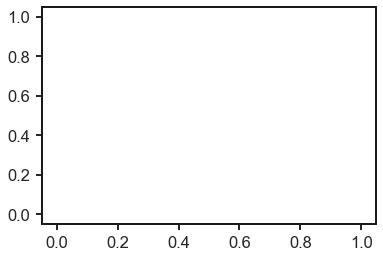

In [291]:
plt.plot(predD)

In [ ]:
[[0, 4, 5, 4, 5, 0],
 [0, 3, 4, 5, 0],
 [0, 1, 0],
 [0, 2, 1, 0],
 [0, 1, 2, 3, 4, 5, 4, 5, 0],
 [0, 0],

In [90]:
decision_seq

[[4, 5, 4, 5, 0],
 [3, 4, 5, 0],
 [1, 0],
 [2, 1, 0],
 [1, 2, 3, 4, 5, 4, 5, 0],
 [0],
 [0],
 [4, 5, 4, 5, 0],
 [1, 0],
 [5, 0],
 [4, 5, 0],
 [2, 1, 0],
 [3, 4, 5, 0],
 [3, 2, 1, 0],
 [3, 4, 5, 0],
 [1, 2, 1, 0],
 [4, 5, 0],
 [2, 1, 0],
 [1, 2, 1, 2, 1, 0],
 [3, 2, 3, 4, 5, 0],
 [2, 1, 2, 3, 4, 5, 0],
 [1, 0],
 [3, 4, 5, 0],
 [1, 2, 1, 2, 1, 0],
 [5, 0, 5, 0, 5, 4],
 [1, 2, 1, 0, 5, 0, 5, 4],
 [4],
 [0, 5, 0, 5, 4],
 [1, 0, 5, 4],
 [3, 4],
 [4],
 [2, 1, 0, 5, 4],
 [3, 4],
 [0, 1, 2, 1, 0, 5, 4],
 [1, 2, 1, 0, 5, 4],
 [1, 2, 1, 0, 5, 4],
 [1, 2, 1, 2, 1, 0, 5, 4],
 [5, 4],
 [4],
 [2, 1, 0, 5, 4],
 [4],
 [4],
 [2, 1, 0, 5, 4],
 [4],
 [2, 3, 4],
 [0, 5, 4],
 [5, 4],
 [3, 4],
 [4],
 [1, 2, 1, 0, 5, 4],
 [3,
  4,
  5,
  4,
  5,
  4,
  5,
  0,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  0,
  5,
  4,
  5,
  4,
  3,
  4,
  5,
  4,
  5,
  0,
  5,
  4,
  5,
  0,
  5,
  4,
  5,
  0,
  5,
  4,
  5,
  0,
  5,
  4,
  3,
  4,
  5,
  4,
  5,
  0,
  5,
  4,
  3,
  4,
  5,
  0,
  5,
  0,
  1,
  2],
 

In [72]:
gamma = .7
[gamma**i for i in reversed(range(len(decision_seq[0])))]

[0.24009999999999995, 0.3429999999999999, 0.48999999999999994, 0.7, 1.0]

In [33]:
def draw_transition_matrix(transition_mtx,ix_,used_states,rew_indices,graph_type='line',verbose=False):
    im = transition_mtx[ix_].copy()[used_states[:,None],used_states[None,:]]
    plt.imshow(np.dstack([np.eye(im.shape[0])*-1 + 1]*3 + [np.eye(im.shape[0])]),cmap='Greys')
    for i in range(len(used_states)-1):
        plt.plot([i+.5,i+1.5],[i-.5,i-.5],color='k')
        plt.plot([i+.5,i+1.5],[i+.5,i+.5],color='k')
        plt.plot([i-.5,i-.5],[i+.5,i+1.5],color='k')
        plt.plot([i+.5,i+.5],[i+.5,i+1.5],color='k')
        plt.plot([i+.5,i+.5],[i-.5,i+.5],color='k')
        plt.plot([i-.5,i+.5],[i+1.5,i+1.5],color='k')
        plt.plot([i+1.5,i+1.5],[i-.5,i+.5],color='k')

    if graph_type=='loop':
        plt.plot([-.5,.5],[4.5,4.5],color='k')
        plt.plot([.5,.5],[4.5,5.5],color='k')
        
        plt.plot([4.5,4.5],[-.5,.5],color='k')
        plt.plot([4.5,5.5],[-.5,-.5],color='k')
        plt.plot([4.5,5.5],[.5,.5],color='k')
        plt.plot([5.5,5.5],[-.5,.5],color='k')

    rloc = rew_indices[ix_]
    #for ix_ in range(transition_mtx.shape[0]):
    #im[np.logical_not(np.nansum(transition_mtx,axis=0)[used_states[:,None],used_states[None,:]]>0)] = np.nan
    tmp_im = np.ones_like(im)*np.nan
    #np.fill_diagonal(tmp_im,1)
    np.fill_diagonal(tmp_im[1:], 1)
    np.fill_diagonal(tmp_im[:,1:], 1)
    if lineloop=='loop': tmp_im[0,-1] = 1; tmp_im[-1,0] = 1


    im = im*tmp_im
    if graph_type=='line':
        if (rew_indices[ix_]-used_states[0])!=0:
            im[0,1] = 1;
        if (rew_indices[ix_]-used_states[0])!=5:
            im[-1,-2] = 1
    #plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
    #ax = plt.gca()
    plt.imshow(im,cmap='RdBu_r',alpha=.9,interpolation='None')
    #plt.colorbar()

    #plt.xticks(plt.xticks()[0],plt.xticks()[0]-.5) 
    #plt.yticks(plt.yticks()[0],plt.yticks()[0]-.5)
    #plt.scatter([rew_indices_state[ix_]-used_states[0]]*im.shape[0],np.arange(im.shape[0]),marker='*',color='k',s=96)
    if verbose:
        plt.gca().text(4,rew_indices_state[ix_]-used_states[0]-.15,'rewarded state',ha='center',va='center',fontsize=12,color='k')

    plt.plot([-.5,im.shape[1]+.5],2*[rew_indices_state[ix_]-used_states[0]],color='.3',alpha=.3)
    plt.plot(2*[rew_indices_state[ix_]-used_states[0]],[-.5,im.shape[1]+.5],color='.3',alpha=.3)
    plt.xlim(-.475,im.shape[0]-.475)
    plt.ylim(im.shape[0]-.475,-.475)

    for (j,i),label in np.ndenumerate(im):
        if not np.isnan(label):
            plt.gca().text(i,j,'{:.2f}'.format(label),ha='center',va='center',fontsize=12)
        #ax2.text(i,j,label,ha='center',va='center')
    plt.tight_layout()
    #plt.ylim(6.5,.5)
    #plt.xlim(.5,6.5)
    seaborn.despine()

In [315]:
draw_transition_matrix(transition_mtx,0,used_states,rew_indices)

TypeError: list indices must be integers or slices, not tuple

In [316]:
used_states

[1, 2, 3, 4, 5, 6]

In [317]:
rew_indices_state

array([1, 3, 5])

# Actual code to run stuff 

In [318]:
ROOT_loop = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_toLOOP//'
ROOT_line = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI///'
#\


In [7]:
fdict = {}

for ROOT,lineloop in zip([ROOT_line,ROOT_loop],['line','loop']):
    fs = os.listdir(ROOT)
    for f in fs:
        f = os.path.join(ROOT,f)

        subject = re.findall("'(.*)'",f)
        #if ('03-04' in f) or ('03-03' in f) or ('03-02' in f):
        if ('03-05' in f):
            if subject: 
                lines =open(f,'r').readlines()

                subject = subject[0]
                experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
                dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)
                
                if nRews>20 and task_nr=='1':
                    print(f)
                    if subject+lineloop in fdict.keys():
                        fdict[subject+lineloop].append(f)
                    else:
                        fdict[subject+lineloop] = [f]



NameError: name 'ROOT_line' is not defined

In [6]:
set_rew_indices = [1,3,5]
transition_res = {}
for subject in fdict.keys():

    for f in fdict[subject]:
        print(f)
        lines = open(f,'r').readlines()
        experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
        #print(task_nr)

        poke_to_state_map,full_pkst_map = get_poke_to_state_map(lines)
        used_states = sorted([i[1] for i in full_pkst_map])
        used_pokes = ([i[0] for i in full_pkst_map])

        map_poke_to_state = functools.partial(map_poke_to_state_fun,full_pkst_map)
        map_state_to_poke = functools.partial(map_state_to_poke_fun,full_pkst_map)
        rew_indices = np.unique([eval(re.findall('REWARD LOCATIONS(\[.*\])',l)[0]) for l in lines if re.findall('REWARD LOCATIONS(\[.*\])',l)][0]).tolist()

        tmtx,rew_indices_state,used_state,ret_ctr,t_unNorm = run_transition_perf_analysis(lines,set_rew_indices=set_rew_indices,minNrew=1)
        #to_ret, rew_indices_state, used_states, ret_ctr, ret_dirs
        if all([i in rew_indices_state for i in set_rew_indices]):  #only if all necessary rewards are present
            if subject in transition_res.keys():
                transition_res[subject].append(tmtx)
                transition_res[subject+'tc'].append(ret_ctr)
                transition_res[subject+'tUn'].append(t_unNorm)
                #transition_res[subject+'ri'].append(rew_indices_state)
                #transition_res[subject+'us'].append(used_states)

            else:
                transition_res[subject] = [tmtx]          #transition matrix
                transition_res[subject+'tc'] = [ret_ctr]  #total counts for each transition
                transition_res[subject+'tUn'] = [t_unNorm]  #transition matrix with counts
                transition_res[subject+'ri'] = rew_indices_state  
                transition_res[subject+'us'] = used_states

NameError: name 'fdict' is not defined

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


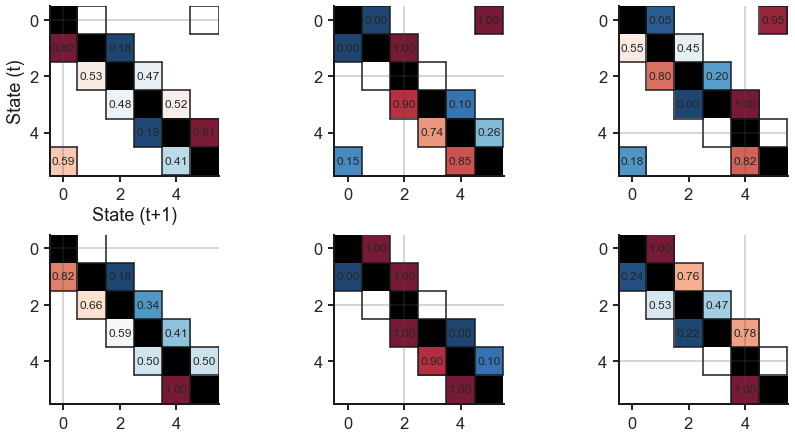

In [296]:
plt.figure(figsize=(12,9))
baseS = '456675_10'
#baseS= '460175_10'
subject = baseS+'loop'
for ctr in range(3):
    plt.subplot(3,3,ctr+1)
    
    draw_transition_matrix(np.nanmean(np.array(transition_res[subject]),axis=0),
                           ctr,
                           used_states=np.array(transition_res[subject+'us']),
                           rew_indices=np.array(transition_res[subject+'ri']),graph_type='loop')
    if ctr==0:
        plt.xlabel("State (t+1)")
        plt.ylabel("State (t)")
subject = baseS+'line'
for ctr in range(3):
    plt.subplot(3,3,ctr+1+3)
    #print(ctr+1+3)
    #print(np.nansum(np.nanmean(np.array(transition_res[subject]),axis=0)[ctr]))
    draw_transition_matrix(np.nanmean(np.array(transition_res[subject]),axis=0),
                           ctr,
                           used_states=np.array(transition_res[subject+'us']),
                           rew_indices=np.array(transition_res[subject+'ri']),graph_type='line')
plt.tight_layout()

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


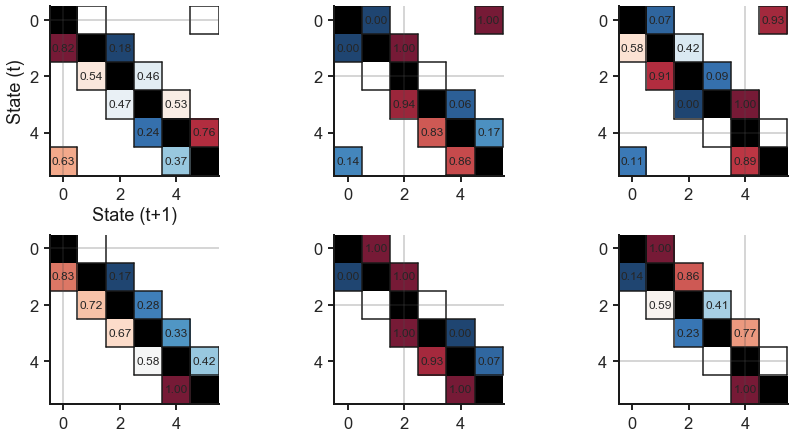

In [321]:
plt.figure(figsize=(12,9))
baseS = '456675_10'
#baseS= '460175_10'
subject = baseS+'loop'
for ctr in range(3):
    plt.subplot(3,3,ctr+1)
    
    draw_transition_matrix(np.nanmean(np.array(transition_res[subject]),axis=0),
                           ctr,
                           used_states=np.array(transition_res[subject+'us']),
                           rew_indices=np.array(transition_res[subject+'ri']),graph_type='loop')
    if ctr==0:
        plt.xlabel("State (t+1)")
        plt.ylabel("State (t)")
subject = baseS+'line'
for ctr in range(3):
    plt.subplot(3,3,ctr+1+3)
    #print(ctr+1+3)
    #print(np.nansum(np.nanmean(np.array(transition_res[subject]),axis=0)[ctr]))
    draw_transition_matrix(np.nanmean(np.array(transition_res[subject]),axis=0),
                           ctr,
                           used_states=np.array(transition_res[subject+'us']),
                           rew_indices=np.array(transition_res[subject+'ri']),graph_type='line')
plt.tight_layout()

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


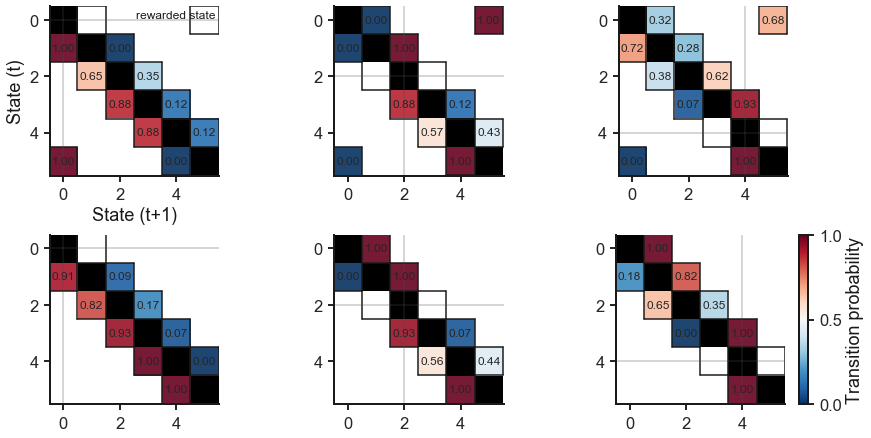

In [283]:
plt.figure(figsize=(12,9))
#baseS = '456675_10'
baseS= '460175_10'
subject = baseS+'loop'
for ctr in range(3):
    plt.subplot(3,3,ctr+1)
    
    draw_transition_matrix(np.nanmean(np.array(transition_res[subject]),axis=0),
                           ctr,
                           used_states=np.array(transition_res[subject+'us']),
                           rew_indices=np.array(transition_res[subject+'ri']),graph_type='loop',verbose=ctr==0)
    if ctr==0:
        plt.xlabel("State (t+1)")
        plt.ylabel("State (t)")

subject = baseS+'line'
for ctr in range(3):
    plt.subplot(3,3,ctr+1+3)
    #print(ctr+1+3)
    #print(np.nansum(np.nanmean(np.array(transition_res[subject]),axis=0)[ctr]))
    draw_transition_matrix(np.nanmean(np.array(transition_res[subject]),axis=0),
                           ctr,
                           used_states=np.array(transition_res[subject+'us']),
                           rew_indices=np.array(transition_res[subject+'ri']))

cbar = plt.colorbar()
cbar.set_label("Transition probability")
cbar.set_ticks([0,.5,1])
#ca


In [284]:
#cbar.minorticks_off()

# Transition matrix analysis

now based on transition matrix define a line-loop adaptation index
the harsh measure, again is if they are above chance on each transition.
You could also think of making a measure whereby you ask if it adapts from conditions
with a given optimal policy. I think this is a nice way of incorporating biases into it
because these should be constant. 

The extreme case would be to decode the condition



In [4]:
def compare_line_rew_loc(transition_res,subject):

    """ Here compare for each state transitions and ask if the behaviour is different when best
        behaviour is different between the two conditions
        
        !!!! This needs to be extended to ask whether the changes are going in the correct direction !!!!
    """
    from scipy.stats import fisher_exact

    #baseS= '460175_10'
    #baseS = '456675_10'

    #subject = baseS+'line'
    
    rew_indices_state = transition_res[subject+'ri']
    used_states = transition_res[subject+'us']
    transition_mtxs = np.nansum(transition_res[subject+'tUn'],axis=0)
    nStates = len(used_states)
    res_dict = {}
    for state in used_states:

        move_up = []; move_down = []
        for rix,rloc in enumerate(rew_indices_state):
            if rloc<state:
                move_down.append(rix)
            elif rloc>state:
                move_up.append(rix)

        if move_up and move_down:
            up_sum = np.nansum([transition_mtxs[i][state] for i in move_up],axis=0)
            down_sum = np.nansum([transition_mtxs[i][state] for i in move_down],axis=0)


            table = np.array([[up_sum[state-1],up_sum[state+1]],
                             [down_sum[state-1],down_sum[state+1]]])

            test = fisher_exact(table)
            res_dict['state_'+str(state)] = {'pval':test[1],'odds-ratio': test[0],'rel_state': state-used_states[0]}
            #print(fisher_exact(table)[1],state-used_states[0],np.sum(table),state)


    return res_dict

In [5]:
#baseS = '456675_10'
baseS= '460175_10'
subject = baseS+'line'

ll_res = compare_line_rew_loc(transition_res,subject)
for i in ll_res.items(): print(i)

NameError: name 'transition_res' is not defined

In [244]:
def get_modulo_distance(rloc,state,nStates=6):
    
    return np.min(np.abs([rloc-state,rloc-(state+nStates),rloc-(state-nStates)]))

In [277]:
#get_modulo_distance(0,4)

In [ ]:
#you want to compare all the cases in the line where 

In [278]:
#def compare_line_with_loop 

"""
The simplest way of doing it would be to say when the reward location is
the same between the two conditions, but the required policy is different.
I think you could also do the intersection though, to get more data and 
simplify the analysis.

The logic is we look at each state. Then for each state we look, separarately
for the line and the loop, at the available next states and the distances from
there to each reward location. Then we 
"""

from scipy.stats import fisher_exact

#baseS= '460175_10'
baseS = '456675_10'

subject = baseS+'line'
subject_f = lambda subj,gtyp: subj+gtype

rew_indices_state = transition_res[subject+'ri']
used_states = sorted(transition_res[subject+'us'])
transition_mtxs = np.nansum(transition_res[subject+'tUn'],axis=0)

res_dict = {}

nStates = len(used_states)
for state in used_states:
    
    state_ = state_ - used_states[0]
    
    
    move_up_line = []; move_up_loop = []
    move_down_line = []; move_down_loop = []
    for rix,rloc in enumerate(rew_indices_state):

        dists_loop = []
        for s2 in [(state_-1)%nStates,(state_+1)%nStates]:
            dists_loop.append(get_modulo_distance(rloc,s2))

        if np.argmin(dists_loop)==0: move_down_loop.append(rix)
        else: move_up_loop.append(rix)
            
        dists_line = []
        for s2 in [(state_-1),(state_+1)]:
            if s2<used_states[0]: dists_line.append(100)
            elif s2>used_states[-1]: dists_line.append(100)
            else: dists_line.append(np.abs(s2-rloc))

        if np.argmin(dists_loop)==0: move_down_loop.append(rix)
        else: move_up_loop.append(rix)
        
    dists_line = []
    for s2
    move_up = []; move_down = []
    for rix,rloc in enumerate(rew_indices_state):
        if rloc<state:
            move_down.append(rix)
        elif rloc>state:
            move_up.append(rix)
        
    if move_up and move_down:
        up_sum = np.nansum([transition_mtxs[i][state] for i in move_up],axis=0)
        down_sum = np.nansum([transition_mtxs[i][state] for i in move_down],axis=0)


        table = np.array([[up_sum[state-1],up_sum[state+1]],
                         [down_sum[state-1],down_sum[state+1]]])
        
        test = fisher_exact(table)
        res_dict['state'+str(state)] = {'pval':test[1],'odds-ratio': test[0],'abs_state': state-used_states[0]}
        print(fisher_exact(table)[1],state-used_states[0],np.sum(table),state)

SyntaxError: invalid syntax (<ipython-input-278-cab3bc36dd6d>, line 55)

In [249]:
(1-2)%6

5

In [ ]:
5-1

In [211]:
fisher_exact(table)[1]

1.8109114921213714e-20

In [201]:
table

array([[ 57., 198.],
       [289., 107.]])

In [202]:
up_sum[state-1]

198.0

In [192]:
down_sum

[array([ 0.,  0., 88.,  0., 54.,  0.,  0.,  0.,  0.])]

In [190]:
rew_indices_state

array([1, 3, 5])

In [183]:
down_sum

[array([ 0.,  0., 88.,  0., 54.,  0.,  0.,  0.,  0.])]

In [184]:
move_down

[0]

In [185]:
move_up

[]

In [181]:
state

2

In [172]:
down_sum

array([ 0., 90.,  0., 25.,  0.,  0.,  0.,  0.,  0.])

In [166]:
move_up

[]

In [147]:
state

3

In [143]:
move_down

[0]

In [141]:
move_down

[0]

In [136]:
[transition_mtxs[i] for i in move_up]

IndexError: list index out of range

In [137]:
move_up

[3, 5]

In [132]:
state

0

In [134]:
transition_mtxs[move_up[0]][state]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [130]:
transition_mtx.shape

(3, 9, 9)

In [127]:
[i for i in move_up]

[1]

In [69]:
transition_res[subject+'ri']

array([1, 3, 5])

In [116]:
def run_transition_perf_analysis(lines):
    experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
    dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)
    poke_to_state_map,full_pkst_map = get_poke_to_state_map(lines)
    used_states = sorted([i[1] for i in full_pkst_map])
    used_pokes = ([i[0] for i in full_pkst_map])

    map_poke_to_state = functools.partial(map_poke_to_state_fun,full_pkst_map)
    map_state_to_poke = functools.partial(map_state_to_poke_fun,full_pkst_map)

    #rew_indices = [0,3,5,8]
    rew_indices = np.unique([eval(re.findall('REWARD LOCATIONS(\[.*\])',l)[0]) for l in lines if re.findall('REWARD LOCATIONS(\[.*\])',l)][0]).tolist()
    perf,perf_ctr = get_performance(dat_dict,map_poke_to_state,rew_indices,lines,minNrew=0)
    transition_mtx,ctr = get_transitions(dat_dict,map_poke_to_state,rew_indices,lines,minNrew=0)

    return (transition_mtx/ctr[:,None])

In [117]:
perf,perf_ctr = get_performance(dat_dict,map_poke_to_state,rew_indices,lines,minNrew=0)
transition_mtx,ctr = get_transitions(dat_dict,map_poke_to_state,rew_indices,lines,minNrew=0)


ValueError: too many values to unpack (expected 2)

In [118]:
transition_mtx[4]

IndexError: index 4 is out of bounds for axis 0 with size 3

In [119]:
(transition_mtx/ctr[:,None])[4].sum()

TypeError: 'int' object is not subscriptable

In [121]:
#print(day_df['filepath'].values[ix])
#f = open("/Users/yves/Documents/behavior_data/line_loop_cohort_1/line_loop_batch_4_RUNNAVI/'456675_3'-2020-12-09-094620.txt",'r')
#f = open("/Volumes/hpc_dat/pycontrol/data/line_loop_batch_4_RUNNAVI/'456675_3'-2021-02-12-121633.txt",'r')
#f = open("/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI/",'r')
#f = open("C:/Users/yweissenberger/Documents/pycontrol_newest_10_02_21/data/line_loop_batch_3NAVI/'456675_10'-2021-03-04-105905.txt",'r')
#f =open("C:/Users/yweissenberger/Documents/pycontrol_newest_10_02_21/data/line_loop_batch_3NAVI_toLOOP/'460175_10'-2021-03-04-154221.txt",'r')
lines =f.readlines()
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)

print("rewards_received: {:d}".format(nRews))
print('task_nr:{:.0f}'.format(int(task_nr)))

AttributeError: 'str' object has no attribute 'readlines'

In [122]:
state_seq = [i[0] for i in dat_dict['state']]
poke_seq = [map_state_to_poke(i) for i in state_seq]
#dat_dict['rews']

In [123]:
poke_to_state_map,full_pkst_map = get_poke_to_state_map(lines)
used_states = sorted([i[1] for i in full_pkst_map])
used_pokes = ([i[0] for i in full_pkst_map])

map_poke_to_state = functools.partial(map_poke_to_state_fun,full_pkst_map)
map_state_to_poke = functools.partial(map_state_to_poke_fun,full_pkst_map)

#rew_indices = [0,3,5,8]
rew_indices = np.unique([eval(re.findall('REWARD LOCATIONS(\[.*\])',l)[0]) for l in lines if re.findall('REWARD LOCATIONS(\[.*\])',l)][0]).tolist()


In [ ]:
print(task_nr)

In [ ]:
perf

In [ ]:
perf,perf_ctr = get_performance(dat_dict,map_poke_to_state,rew_indices,lines,minNrew=0)
fc = perf/perf_ctr
#fc[np.isnan(fc)] = 1
print(np.nanmean(fc))

In [ ]:
np.nansum(perf)/np.nansum(perf_ctr)

In [ ]:
perf

In [ ]:
plt.title('Each column is one reward location')
rew_diag_mtx = np.dstack([np.eye(perf.shape[0])*-1 + 1]*3 + [np.eye(perf.shape[0])])
fcplot = (perf/perf_ctr)
np.fill_diagonal(fcplot,np.nan)
plt.imshow(rew_diag_mtx,cmap='Greys')
plt.imshow(fcplot,vmin=0,vmax=1,cmap='RdBu_r')
#plt.xlim(.5,6.5); plt.ylim(6.5,.5)
plt.colorbar()

# Run as batch analysis the above 

In [ ]:
now = datetime.now()

In [ ]:
ROOT = "C:/Users/yweissenberger/Documents/pycontrol_newest_10_02_21/data/line_loop_batch_3NAVI/"
fs = os.listdir(ROOT)
res_dict = {}
minNRew = 10
today = datetime.now()
for f_ in fs:
        
    fpath = os.path.join(ROOT,f_)
    if os.path.isfile(fpath):
        subject = eval(re.findall("('.*')",f_)[0])
        #print(subject)

        t1_ = re.findall(r'(202.*)-[0-9]{6}.txt',f_)[0]
        t1_ = datetime.strptime(t1_,'%Y-%m-%d')
        
        if (now - t1_).days<=2:
            f = open(fpath,'r')

            lines =f.readlines()
            experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
            dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)
            subject = subject + '_' + str(task_nr)
            print(task_nr,fpath)
            if nRews>20:

                poke_to_state_map,full_pkst_map = get_poke_to_state_map(lines)
                used_states = sorted([i[1] for i in full_pkst_map])
                used_pokes = ([i[0] for i in full_pkst_map])

                map_poke_to_state = functools.partial(map_poke_to_state_fun,full_pkst_map)
                map_state_to_poke = functools.partial(map_state_to_poke_fun,full_pkst_map)

                #rew_indices = [0,3,5,8]
                rew_indices = np.unique([eval(re.findall('REWARD LOCATIONS(\[.*\])',l)[0]) for l in lines if re.findall('REWARD LOCATIONS(\[.*\])',l)][0]).tolist()
                perf,perf_ctr = get_performance(dat_dict,map_poke_to_state,rew_indices,lines,minNrew=minNRew)

                if subject not in res_dict.keys():
                    res_dict[subject] = [[perf,perf_ctr]]
                else:
                    res_dict[subject].append([perf,perf_ctr])


In [ ]:
plt.figure(figsize=(10,8))
for ctr,subject in enumerate(res_dict.keys()):
    
    plt.subplot(2,2,ctr+1)
    plt.title("Subject: {} | Graph: {}".format(subject[:-2],subject[-1]))
    allp = np.nansum([i[0] for i in res_dict[subject]],axis=0)
    allp_ctr = np.nansum([i[1] for i in res_dict[subject]],axis=0)
    fc = (allp/allp_ctr)
    np.fill_diagonal(fc,np.nan)
    plt.imshow(np.dstack([np.eye(perf.shape[0])*-1 + 1]*3 + [np.eye(perf.shape[0])]),cmap='Greys')
    plt.imshow(fc,vmin=0,vmax=1,cmap='RdBu_r')
    
    if ctr==0:
        plt.xlabel("Rewarded State")
        plt.ylabel("Current State")
        cbar = plt.colorbar()
        cbar.set_label("Fraction correct")

plt.tight_layout()

# Other

In [ ]:
st = np.min(np.where(np.nansum(perf,axis=1))[0]) - 1
nd = np.max((np.where(np.nansum(perf,axis=1))[0])) + 1


#these are the pokes used for reward in this session
used_rews = np.array([np.where(np.isnan(perf[:,i]))[0] for i in np.where(np.nansum(perf,axis=0))[0]]).flatten()
used_rew_cols = np.where(np.nansum(perf,axis=0))[0]

In [ ]:
ix = used_rew_cols[0]
c_rew_index = ix

#good_edges = [[map_state_to_poke(0),map_state_to_poke(1)],
#              [map_state_to_poke(8),map_state_to_poke(7)]]
bad_edges = []
good_edges = []
for s in range(st-1,nd+1):
    if s!=c_rew_index and s in used_states:
        d1 = np.abs(c_rew_index-(s+1))  #distances of state above to reward
        d2 = np.abs(c_rew_index-(s-1))  #distance of state below to reward
        min_ = np.argmin([d1,d2])
        max_ = np.argmax([d1,d2])
        
        if [s+1,s-1][min_] in used_states:
            good_edges.append([s,[s+1,s-1][min_]])  #good edges in terms of pokes
        
        if [s+1,s-1][max_] in used_states:
            bad_edges.append([s,[s+1,s-1][max_]])   #bad edges in terms of pokes

In [ ]:
map_state_to_poke(ix)

In [ ]:
used_rew_cols

In [ ]:
#rew_indices = [0,1,4,5]

In [ ]:
st = np.min(np.where(np.nansum(perf,axis=1))[0]) - 1
nd = np.max((np.where(np.nansum(perf,axis=1))[0])) + 1


#these are the pokes used for reward in this session
used_rews = np.array([np.where(np.isnan(perf[:,i]))[0] for i in np.where(np.nansum(perf,axis=0))[0]]).flatten()
used_rew_cols = np.where(np.nansum(perf,axis=0))[0]

In [ ]:
nd

In [ ]:
plt.figure(figsize=(18,4))
ctr = 1
for ix in used_rew_cols:
    plt.subplot(1,len(used_rew_cols),ctr)

    c_rew_index = ix  #this is correct, used_rews here are in terms of states

    bad_edges = []
    good_edges = []
    same_edges = []
    good_edges = [[map_state_to_poke(used_states[0]),map_state_to_poke(used_states[1])],
                  [map_state_to_poke(used_states[-1]),map_state_to_poke(used_states[-2])]]

    for s in range(st-2,nd+2):
        if s!=c_rew_index and s in used_states:
            su = s+1 #state_up
            sd = s-1 #state_down
            if lineloop=='loop': 
                if su==used_states[-1]+1:
                    su= used_states[0]
                if sd==used_states[0]-1:
                    sd = used_states[-1]
            d1 = np.abs(c_rew_index-(su))  #distances of state above to reward
            d2 = np.abs(c_rew_index-(sd))  #distance of state below to reward
            
            if d1==d2:
                if mn_ in used_states:
                    good_edges.append([map_state_to_poke(s),map_state_to_poke(mn_)])

                if mx_ in used_states:
                    bad_edges.append([map_state_to_poke(s),map_state_to_poke(mx_)])

            else:
                
                min_ = np.argmin([d1,d2])
                max_ = np.argmax([d1,d2])

                mn_ = [su,sd][min_]; mx_ = [su,sd][max_]
                if mn_ in used_states:
                    good_edges.append([map_state_to_poke(s),map_state_to_poke(mn_)])

                if mx_ in used_states:
                    bad_edges.append([map_state_to_poke(s),map_state_to_poke(mx_)])

                

    pos = np.array([1,-1])*poke_pos
    G0 = nx.DiGraph()
    G0.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos)
    nx.draw(G0,pos=pos,alpha=.2)
    G = nx.DiGraph()
    G.add_nodes_from(sorted(used_pokes))
    weights = []
    
    rew_col = fc[:,ix]
    
    for e in good_edges:
        G.add_edge(e[0],e[1],weight=rew_col[map_poke_to_state(e[0])],color='g')

    for e in bad_edges:
        G.add_edge(e[0],e[1],weight=1-rew_col[map_poke_to_state(e[0])],color='r')

    weights = nx.get_edge_attributes(G,'weight')
    colors = nx.get_edge_attributes(G,'color')
    node_colors = ['.3' for _ in range(len(used_states))]
    
    node_colors[list(G.nodes).index(map_state_to_poke(c_rew_index))] = 'g'
    #node_colors[0] = 'g'
    nx.draw(G,
        pos=pos,
            width=(10**(np.array(list(weights.values()))))/2,
            edge_color=np.array(list(colors.values())),
            connectionstyle="arc3,rad=-0.1",
            node_color=node_colors,
            node_size=768)
    #print(G.node)
    ctr += 1
plt.tight_layout()
#plt.savefig("/Users/yves/Desktop/tpf/navi_decisions.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_decisions.png",dpi=300)


In [ ]:
map_state_to_poke(c_rew_index)

In [ ]:
list(G.node)

In [ ]:
ix

In [ ]:
fc.shape

In [ ]:
map_state_to_poke(used_rews[ix])

In [ ]:
fc[:,0]

In [ ]:
fc.shape

In [ ]:
us

In [ ]:
used_rews[ix]

In [ ]:
used_states

In [ ]:
used_pokes

In [ ]:
len(used_states)

In [ ]:
len(node_colors)

In [ ]:
nx.draw(G,pos=pos,
        width=(10**(np.array(list(weights.values()))))/2
        
       )


In [ ]:
good_edges

In [ ]:
bad_edges

In [ ]:
pos

In [ ]:
weights

In [ ]:
e[0]

In [ ]:
sqr = fc
sqr[0] = 1
sqr[-1] = 1
plt.imshow(sqr,vmin=0,vmax=1,cmap='RdBu_r')
plt.xlabel("Rew Location")
plt.xticks([0,1,2,3],['T','L','R','B'])
plt.ylabel("State")
cbar = plt.colorbar()
cbar.set_label("Fraction Correct")
plt.tight_layout()

In [ ]:
fc = perf/perf_ctr
fc[np.isnan(fc)] = 1

In [ ]:
fc

# Performance history

In [ ]:
ROOT = '/Users/yves/Documents/behavior_data/line_loop_cohort_1/line_loop_batch_4_RUNNAVI/'
fs = sorted([os.path.join(ROOT,i) for i in os.listdir(ROOT) if '.txt' in i])
perf_hist = []
all_fc  = []
all_perf = np.zeros([9,4])
all_ctr = np.zeros([9,4])
for f_ in fs[:-1]:
    try:
        f = open(f_,'r')
        lines =f.readlines()
        experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
        dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)

        #poke_to_state_map = get_poke_to_state_map(lines)
        rew_indices = [0,3,5,8]
        perf,perf_ctr = get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=20)

        fc = perf/perf_ctr
        all_perf += perf
        all_ctr += perf_ctr
        all_fc.append(fc)
        perf_hist.append(np.nanmean(fc))
    except:
        pass

In [ ]:
all_perf/all_ctr

In [ ]:
stt.binom_test(0.57*400,n=400)

In [ ]:
fc

In [ ]:
#np.nanmean(all_fc[-5:],axis=0)

In [ ]:
#sqr = all_perf/all_ctr
sqr = np.nanmean(all_fc[-10:],axis=0)
fc = sqr
sqr[0] = 1
sqr[-1] = 1
plt.imshow(sqr,vmin=0,vmax=1,cmap='RdBu_r',aspect=.7)
plt.xlabel("Rew Location")
plt.xticks([0,1,2,3],['T','L','R','B'])
plt.ylabel("State")
cbar = plt.colorbar()
cbar.set_label("Fraction Correct")
#cbar.ax.
plt.tight_layout()
#plt.tight_layout*
#plt.savefig("/Users/yves/Desktop/tpf/navi_frac_corr_by_state.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_frac_corr_by_state.png",dpi=300)
print(sqr)

In [ ]:
seaborn.set(font_scale=1.5,style='ticks',rc={'axes.edgecolor': 'k',
                                             'axes.linewidth': 2,
                                             #'xtick.major.size': 6,
                                             'axes.labelcolor':'k',
                                             'xtick.major.width': 2,
                                             'ytick.major.width': 2,
                                             'xtick.major.pad': 5.5,
                                             'ytick.major.pad': 5.5,
                                             'axes.labelsize': 18
                                            })
